In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('/content/cleaned_booking_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,14.0,0,transient,0.0,0,0,Check-Out,2015-01-07,0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,14.0,0,transient,0.0,0,0,Check-Out,2015-01-07,0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,14.0,0,transient,75.0,0,0,Check-Out,2015-02-07,1,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0,transient,75.0,0,0,Check-Out,2015-02-07,1,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0,transient,98.0,0,1,Check-Out,2015-03-07,2,2015-07-01


In [5]:
# converting columns to datetime

df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])
df["arrival_date"] = pd.to_datetime(df["arrival_date"])

<ipython-input-6-d8ac9c0e53f7>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  revenue_trends["date"] = pd.to_datetime(revenue_trends["arrival_date_year"].astype(str) + "-" + revenue_trends["arrival_date_month"])


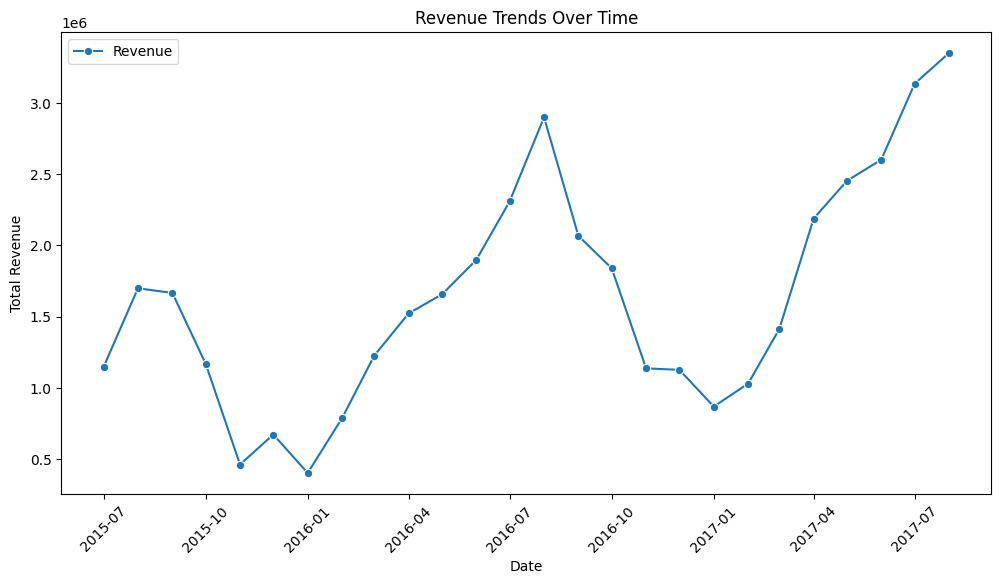

In [6]:
# Revenue trends over months

df["revenue"] = df["adr"] * (df["stays_in_week_nights"] + df["stays_in_weekend_nights"])

# Group by year and month
revenue_trends = df.groupby(["arrival_date_year", "arrival_date_month"])["revenue"].sum().reset_index()

# Convert month names to datetime format for sorting
revenue_trends["date"] = pd.to_datetime(revenue_trends["arrival_date_year"].astype(str) + "-" + revenue_trends["arrival_date_month"])

# Plot the revenue trends
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="revenue", data=revenue_trends, marker="o", label="Revenue")
plt.xticks(rotation=45)
plt.title("Revenue Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.legend()
plt.show()


In [7]:
# calculating the cancellation rate

cancellation_rate = (df["is_canceled"].sum() / len(df)) * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")


Cancellation Rate: 37.04%


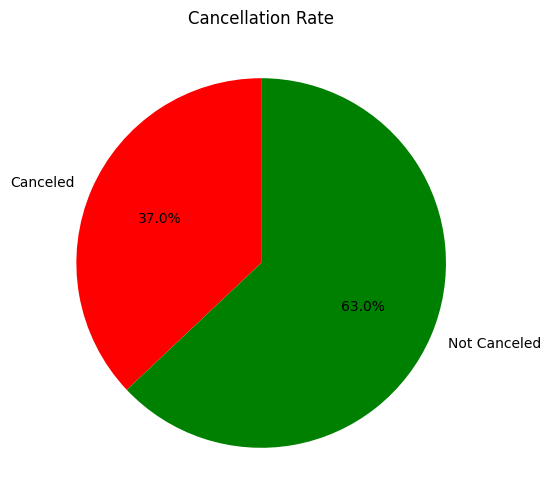

In [8]:
# Generate pie chart of cancellattion rate

plt.figure(figsize=(6, 6))
labels = ["Canceled", "Not Canceled"]
sizes = [df["is_canceled"].sum(), len(df) - df["is_canceled"].sum()]
colors = ["red", "green"]

plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90)
plt.title("Cancellation Rate")
plt.show()


<ipython-input-9-05d9bbf05874>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")


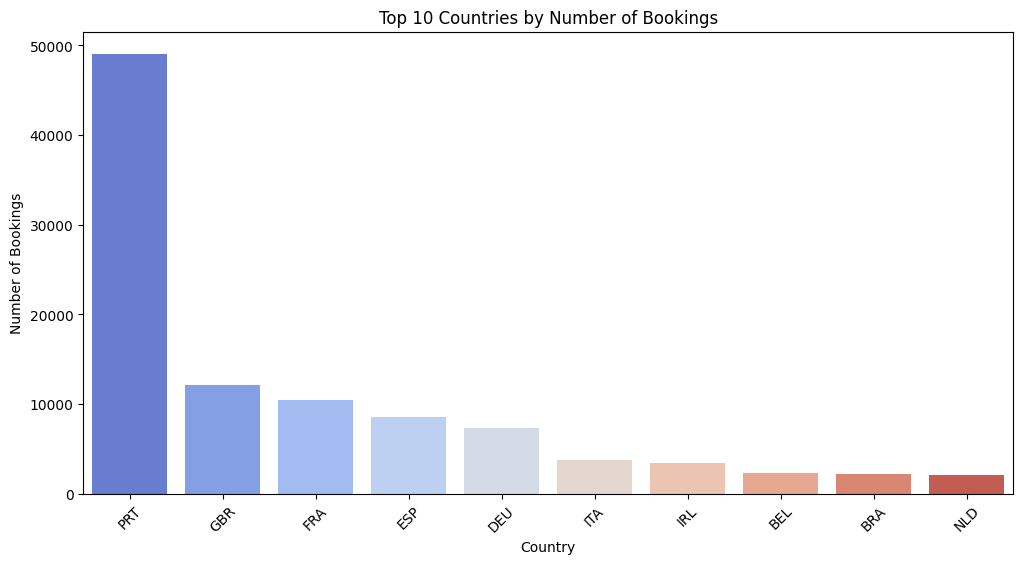

In [9]:
# barplot of 10 top countries no of bookings

country_counts = df["country"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")
plt.title("Top 10 Countries by Number of Bookings")
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()


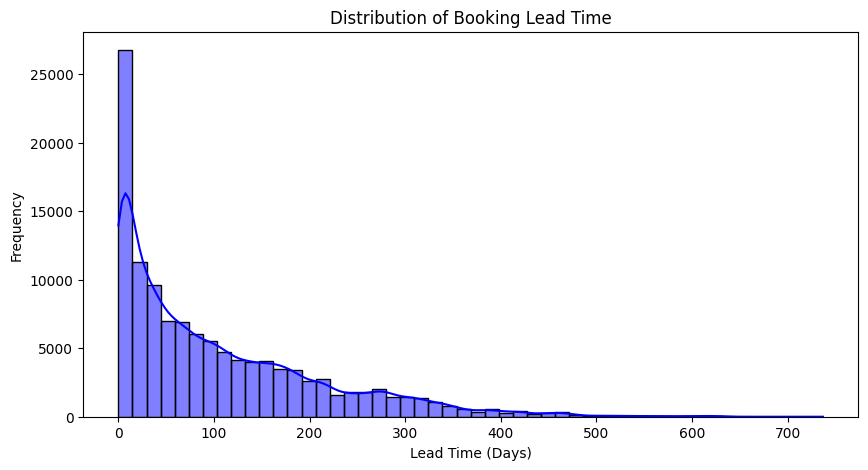

In [13]:
# Histogram of lead timme

plt.figure(figsize=(10, 5))
sns.histplot(df["lead_time"], bins=50, kde=True, color="blue")
plt.title("Distribution of Booking Lead Time")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Frequency")
plt.show()


<ipython-input-11-abef7414c8fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["customer_type"], palette="Set2")


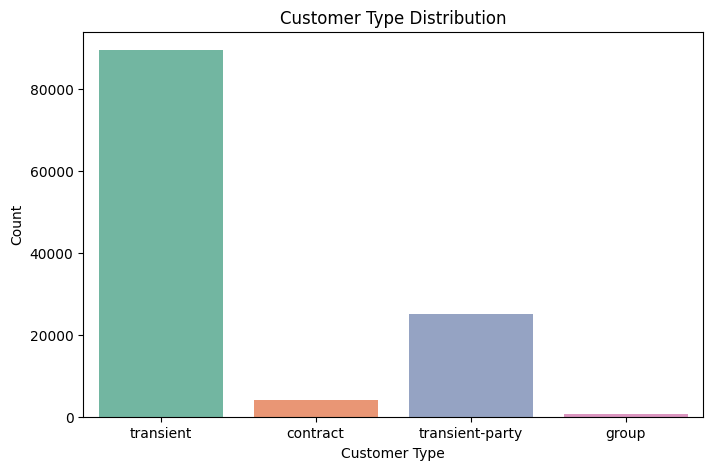

In [11]:
# countplot of customer types

plt.figure(figsize=(8, 5))
sns.countplot(x=df["customer_type"], palette="Set2")
plt.title("Customer Type Distribution")
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.show()


In [12]:
# saving the analytics results

analytics_results = {
    "cancellation_rate": cancellation_rate,
    "total_revenue": df["revenue"].sum(),
    "total_bookings": len(df),
    "top_countries": df["country"].value_counts().head(10).to_dict()
}

import json
with open("analytics_report.json", "w") as file:
    json.dump(analytics_results, file, indent=4)

print("Analytics report saved successfully.")
analytics_results = {
    "cancellation_rate": cancellation_rate,
    "total_revenue": df["revenue"].sum(),
    "total_bookings": len(df),
    "top_countries": df["country"].value_counts().head(10).to_dict()
}

import json
with open("analytics_report.json", "w") as file:
    json.dump(analytics_results, file, indent=4)

print("Analytics report saved successfully.")


Analytics report saved successfully.
Analytics report saved successfully.
